# **IMPORTING LIBRARIES**

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **READING CSV FILE**

---








In [ ]:
df = pd.read_csv("/content/drive/My Drive/filename.csv")
df.head()

,ID_tx,ID_rx,X_tx,Y_tx,X_rx,Y_rx,Pr,LQI,RSSI
0,13,1,2.6,5.72,1.0,1.0,-58,103,NaN
1,2,1,1.0,2.18,1.0,1.0,-23,103,NaN
2,13,1,2.6,5.72,1.0,1.0,-60,101,NaN
3,5,1,1.0,5.72,1.0,1.0,-58,102,NaN
4,4,1,1.0,4.54,1.0,1.0,-37,107,NaN


In [ ]:
df.describe()

,ID_tx,ID_rx,X_tx,Y_tx,X_rx,Y_rx,Pr,LQI,RSSI
count,716406.000000,716406.000000,716406.00000,716406.000000,716406.000000,716406.000000,716406.000000,716406.000000,0.0
mean,24.448663,24.528882,4.99977,5.070780,5.005108,5.133945,-52.389778,101.289053,NaN
std,13.704621,13.855265,2.70414,2.706401,2.732869,2.704657,9.715555,9.137722,NaN
min,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,-96.000000,31.000000,NaN
25%,13.000000,13.000000,2.60000,2.180000,2.600000,3.360000,-58.000000,101.000000,NaN
50%,24.000000,25.000000,4.20000,4.540000,5.800000,5.720000,-54.000000,105.000000,NaN
75%,36.000000,37.000000,7.40000,6.900000,7.400000,8.080000,-48.000000,107.000000,NaN
max,48.000000,48.000000,9.00000,9.260000,9.000000,9.260000,-13.000000,108.000000,NaN


# **CREATING ID_rx AND ID_tx DUMMIES**

---







In [ ]:
dumies_tx = pd.get_dummies(df.ID_tx)
dumies_tx

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716401,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
716402,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
716403,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
716404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dumies_tx = dumies_tx.drop([48], axis = 'columns')

In [ ]:
dumies_rx = pd.get_dummies(df.ID_rx)
dumies_rx

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716401,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
716402,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
716403,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
716404,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dumies_rx = dumies_rx.drop([48], axis = 'columns')#number of dumies=no of categorical variables-1

# **CREATING INDEPENDENT FRAME ind**

---



In [ ]:
merged= pd.concat([df,dumies_tx,dumies_rx], axis='columns')
ind =merged.drop(['ID_rx','ID_tx','X_rx','Y_rx','RSSI'] ,axis = 'columns')
ind

,X_tx,Y_tx,Pr,LQI,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,2.6,5.72,-58,103,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2.18,-23,103,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.6,5.72,-60,101,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,5.72,-58,102,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4.54,-37,107,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716401,1.0,6.90,-55,103,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
716402,7.4,3.36,-62,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
716403,4.2,8.08,-51,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
716404,4.2,8.08,-51,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **CREATING DEPENDENDENT FRAMES dep1 AND dep2**

---



In [ ]:
dep1 = df['X_rx']
dep1

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
716401    2.6
716402    2.6
716403    2.6
716404    2.6
716405    2.6
Name: X_rx, Length: 716406, dtype: float64

In [ ]:
dep2= df['Y_rx']
dep2

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
716401    1.0
716402    1.0
716403    1.0
716404    1.0
716405    1.0
Name: Y_rx, Length: 716406, dtype: float64

#**GRAPHS**

---


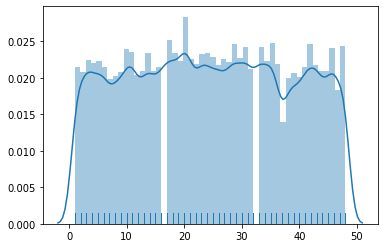

In [ ]:
data = df[['ID_tx']]
sns.distplot(data, hist=True, rug=True);

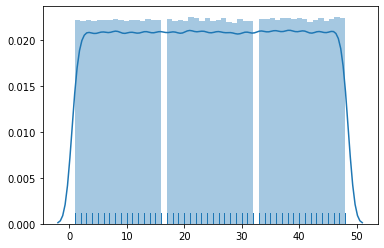

In [ ]:
data = df[['ID_rx']]
sns.distplot(data, hist=True, rug=True);

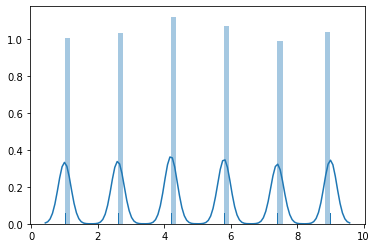

In [ ]:
data = df[['X_tx']]
sns.distplot(data, hist=True, rug=True);

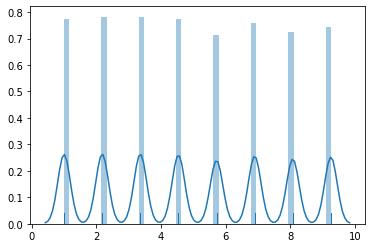

In [ ]:
data = df[['Y_tx']]
sns.distplot(data, hist=True, rug=True);

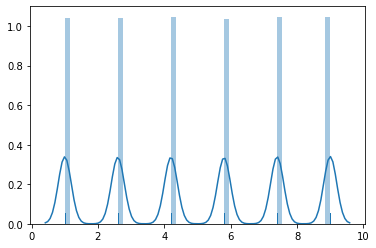

In [ ]:
data = df[['X_rx']]
sns.distplot(data, hist=True, rug=True);

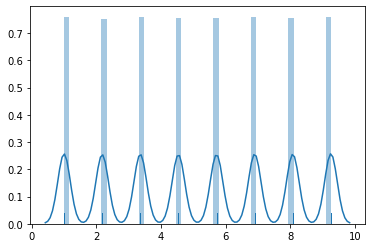

In [ ]:
data = df[['Y_rx']]
sns.distplot(data, hist=True, rug=True);

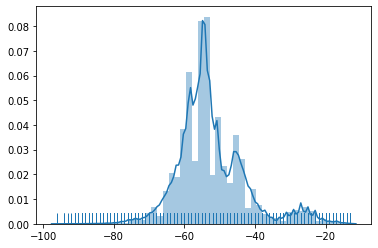

In [ ]:
data = df[['Pr']]
sns.distplot(data, hist=True, rug=True);

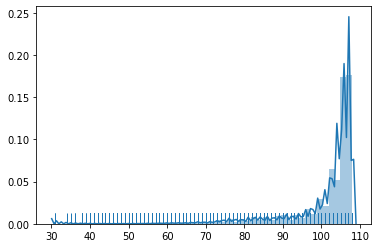

In [ ]:
data = df[['LQI']]
sns.distplot(data, hist=True, rug=True);

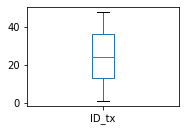

In [ ]:
data = df['ID_tx']
data.plot(kind= 'box' , subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

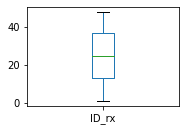

In [ ]:
data = df['ID_rx']
data.plot(kind= 'box' , subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

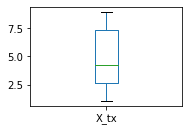

In [ ]:
data = df['X_tx']
data.plot(kind= 'box' , subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

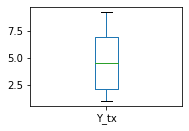

In [ ]:
data = df['Y_tx']
data.plot(kind= 'box' , subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

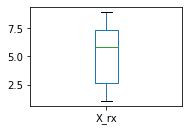

In [ ]:
data = df['X_rx']
data.plot(kind= 'box' , subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

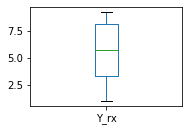

In [ ]:
data = df['Y_rx']
data.plot(kind= 'box' , subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

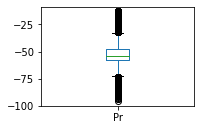

In [ ]:
data = df['Pr']
data.plot(kind= 'box' , subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

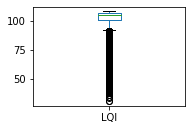

In [ ]:
data = df['LQI']
data.plot(kind= 'box' , subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

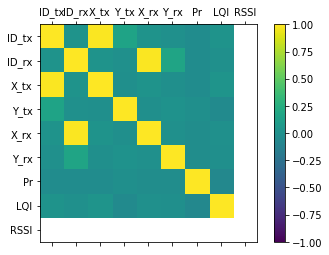

In [ ]:
correlations = df.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df)
ax.set_yticklabels(df)
pyplot.show()

# **TRAIN TEST SPLIT APPLIED**

---



In [ ]:
ind_train1, ind_test1, dep1_train, dep1_test = train_test_split(ind,dep1,test_size = 0.33, random_state = 0 )
ind_train2, ind_test2, dep2_train, dep2_test = train_test_split(ind,dep2,test_size = 0.33, random_state = 0 )

# **APPLYING REGRESSION FOR FITTING**

In [ ]:
regressor_1 = DecisionTreeRegressor(random_state=0,max_depth=30)
regressor_1.fit(ind_train1,dep1_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=30,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
regressor_2 = DecisionTreeRegressor(random_state=0,max_depth=30)
regressor_2.fit(ind_train2,dep2_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=30,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

# **PREDICTION AND PRINTING OF SCORES** 

---



In [ ]:
dep_pred1 = regressor_1.predict(ind_test1)
dep_pred1

array([1.        , 2.6       , 7.93528293, ..., 7.93528293, 7.93528293,
       4.2       ])

In [ ]:
score1 = r2_score(dep1_test,dep_pred1)
print(score1)

0.9432620651349661


In [ ]:
dep_pred2 = regressor_2.predict(ind_test2)
dep_pred2

array([7.09949042, 7.09949042, 7.09949042, ..., 7.09949042, 4.54      ,
       2.18      ])

In [ ]:
score2 = r2_score(dep2_test, dep_pred2)
print(score2)

0.942480689510909




---

